In [1]:
import os
# numerical computing package
import numpy as np
# 
from scipy import stats
# command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
# matplotlib
import matplotlib
# find nearest value
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()
#
import sys
#
import pickle
#
import xarray as xr
#
from glob import glob as gb
#
import time
#
import cartopy.crs as ccrs
#
from copy import deepcopy as cp

In [7]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [8]:
!pwd

/home/561/erd561/mom/gfdl_nyf_1080_rcp85


In [9]:
figures_path = '/home/561/erd561/figures/SAMexp/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

nyf_path = '/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/'
ctrl_path = '/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/'
hist5069_path = '/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/'
rcp85_path = '/g/data/e14/erd561/mom/gfdl_nyf_1080_rcp85/archive/'

Figures will be saved in: /home/561/erd561/figures/SAMexp/t12_currents



In [10]:
%%time

from dask.distributed import Client
c = Client()
print(c)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


<Client: scheduler='tcp://127.0.0.1:45244' processes=4 cores=8>
CPU times: user 609 ms, sys: 189 ms, total: 798 ms
Wall time: 3.29 s


In [25]:
# ice_daily, ice_month, ocean_bgc_2d, ocean_bgc_carbon, ocean_bgc_daily,
# ocean_bgc_npzd, ocean_cfc, ocean_force, ocean_global, ocean_month, ocean_surface

nyf_years = np.arange(477, 487)
ctrl_years = np.arange(556, 576)
# hist5069_years = np.arange(501, 576)
rcp85_years = np.arange(601, 621)

nyf_years_len = len(nyf_years)
ctrl_years_len = len(ctrl_years)
# hist5069_years_len = len(hist5069_years)
rcp85_years_len = len(rcp85_years)

years = np.concatenate([
    np.arange(1-nyf_years_len, 0), 
    np.arange(0, ctrl_years_len+1), 
    np.arange(ctrl_years_len+1, ctrl_years_len+1 + rcp85_years_len)])
print(years)
print(len(years))

# 1. SST
var1 = 'ice_month'
path1 = []

# 2. tx and ty trans
var21 = 'ocean'
var22 = 'ocean_month'
path2 = []

# var31 = 'ocean'
# var32 = 'ocean_month'
# path3 = []

for y in nyf_years:
    path1.append(nyf_path + 'output' + str(y) + '/' + var21 + '.nc')
    path2.append(nyf_path + 'output' + str(y) + '/' + var21 + '.nc')
#     path3.append(remote_path_ctrl + 'output' + str(y) + '/' + var31 + '.nc')

for y in ctrl_years:
    path1.append(ctrl_path + 'output' + str(y) + '/' + var22 + '.nc')
    path2.append(ctrl_path + 'output' + str(y) + '/' + var22 + '.nc')
#     path3.append(remote_path + 'output' + str(y) + '/' + var32 + '.nc')

for y in rcp85_years:
    path1.append(rcp85_path + 'output' + str(y) + '/' + var22 + '.nc')
    path2.append(rcp85_path + 'output' + str(y) + '/' + var22 + '.nc')
#     path3.append(remote_path + 'output' + str(y) + '/' + var32 + '.nc')


for p1,p2 in zip(path1,path2):
    print(p1)
    print(p2)
#     print(p3)


[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40]
50
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output477/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output477/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output478/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output478/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output479/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output479/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output480/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output480/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output481/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output481/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output482/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output482/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output483/ocean.nc
/g/data/v45

In [27]:
%%time

lon = [100-360, 170-360]
lat = [-60, -10]

for p1,p2 in zip(path1, path2):
    if p1 == path1[0]:
        u = \
            xr.open_dataset(p2, decode_times=False).\
            u.\
            sel(xu_ocean=slice(lon[0], lon[1])).\
            sel(yu_ocean=slice(lat[0], lat[1])).\
            sel(st_ocean=slice(0,30)).\
            mean(dim='st_ocean').\
            mean(dim='time').\
            drop(('geolon_c', 'geolat_c'))*100
        
        v = \
            xr.open_dataset(p2, decode_times=False).\
            v.\
            sel(xu_ocean=slice(lon[0], lon[1])).\
            sel(yu_ocean=slice(lat[0], lat[1])).\
            sel(st_ocean=slice(0,30)).\
            mean(dim='st_ocean').\
            mean(dim='time').\
            drop(('geolon_c', 'geolat_c'))*100
        
        print(str(p1) + ' OK')
            
    elif 'v45' in p1:
        u = \
            xr.concat([
                u,
                xr.open_dataset(p2, decode_times=False).\
                u.\
                sel(xu_ocean=slice(lon[0], lon[1])).\
                sel(yu_ocean=slice(lat[0], lat[1])).\
                sel(st_ocean=slice(0,30)).\
                mean(dim='st_ocean').\
                mean(dim='time').\
                drop(('geolon_c', 'geolat_c'))*100
            ], 'year'
            )
        
        v = \
            xr.concat([
                v,
                xr.open_dataset(p2, decode_times=False).\
                v.\
                sel(xu_ocean=slice(lon[0], lon[1])).\
                sel(yu_ocean=slice(lat[0], lat[1])).\
                sel(st_ocean=slice(0,30)).\
                mean(dim='st_ocean').\
                mean(dim='time').\
                drop(('geolon_c', 'geolat_c'))*100
            ], 'year'
            )
        
        print(str(p1) + ' OK')
        
    else:
        u = \
            xr.concat([
                u,
                xr.open_dataset(p2, decode_times=False).\
                u.\
                sel(xu_ocean=slice(lon[0], lon[1])).\
                sel(yu_ocean=slice(lat[0], lat[1])).\
                sel(st_ocean=slice(0,30)).\
                mean(dim='st_ocean').\
                mean(dim='time')*100
            ], 'year'
            )
        
        v = \
            xr.concat([
                v,
                xr.open_dataset(p2, decode_times=False).\
                v.\
                sel(xu_ocean=slice(lon[0], lon[1])).\
                sel(yu_ocean=slice(lat[0], lat[1])).\
                sel(st_ocean=slice(0,30)).\
                mean(dim='st_ocean').\
                mean(dim='time')*100
            ], 'year'
            )
        
        print(str(p1) + ' OK')
print(u)
print(v)

u = u.assign_coords(xu_ocean=xu_ocean_corrected)
v = v.assign_coords(xu_ocean=xu_ocean_corrected)

u = u.assign_coords(year=years)
v = v.assign_coords(year=years)

/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output477/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output478/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output479/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output480/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output481/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output482/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output483/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output484/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output485/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output486/ocean.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output556/ocean_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output557/ocean_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output558/ocean_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output559/ocean_month.nc O

<xarray.DataArray 'u' (year: 50, yu_ocean: 261, xu_ocean: 281)>
array([[[  2.299731,   3.683562, ...,  16.348194,  16.256924],
        [  4.486864,   5.258146, ...,  17.114864,  16.518553],
        ...,
        [-14.236341, -13.983949, ...,  -8.086968,  -8.104499],
        [-13.70861 , -13.511914, ...,  -7.694484,  -7.738638]],

       [[  2.523731,   3.845604, ...,  20.704788,  19.249035],
        [  5.070777,   5.852419, ...,  23.739614,  23.340805],
        ...,
        [-18.564367, -18.524027, ...,  -8.390326,  -8.437046],
        [-18.656303, -18.816643, ...,  -7.794482,  -7.958988]],

       ...,

       [[  1.0562  ,   2.664583, ...,   0.879469,   0.733904],
        [  4.713784,   6.626445, ...,   3.030629,   2.589602],
        ...,
        [ -7.702717,  -7.370598, ...,  -3.061078,  -3.139351],
        [ -8.371375,  -8.074984, ...,  -2.418376,  -2.553994]],

       [[  1.642766,   2.820995, ...,   4.821949,   6.523896],
        [  3.673784,   5.510216, ...,   9.6234  ,  11.23990

In [28]:
u_nyf = u.sel(year=slice(-9,0)).mean(dim='year')
u_hist5069 = u.sel(year=slice(1,20)).mean(dim='year')
u_rcp85 = u.sel(year=slice(21,40)).mean(dim='year')

v_nyf = v.sel(year=slice(-9,0)).mean(dim='year')
v_hist5069 = v.sel(year=slice(1,20)).mean(dim='year')
v_rcp85 = v.sel(year=slice(21,40)).mean(dim='year')

h_ek = 30
rho_0 = 1027
omega = 7.2921*10**-5
lat = tau_x_hist5069.xu_ocean
f = 2 * omega * np.sin(lat * np.pi / 180)
f = np.expand_dims(f, axis=0)
V_ek_hist5069 = tau_x_hist5069 / f / rho_0
V_ek_rcp85 = tau_x_rcp85 / f / rho_0

(92,)
(132,)
(132, 92)
(132, 92)
(132, 92)
(132, 92)
(132, 92)
[[-3.1900406e-04  1.1995077e-02 -1.0318041e-02 ...  1.2388358e+00
   1.8505273e+00  5.2507687e+00]
 [ 7.1376181e-01  7.6697028e-01  9.2334604e-01 ...  1.6142502e+00
   1.6268854e+00  2.4015245e+00]
 [ 1.5065818e+00  1.7116857e+00  2.1031740e+00 ... -1.2297678e-01
   6.2604046e-01  1.0553923e+00]
 ...
 [           nan            nan            nan ... -2.2329593e-01
  -3.4064937e-01 -4.9489498e-01]
 [           nan            nan            nan ...  3.9674771e-01
   2.7471054e-01  6.5039158e-02]
 [           nan            nan            nan ... -4.0993917e-01
  -3.0446714e-01 -2.5018591e-01]]


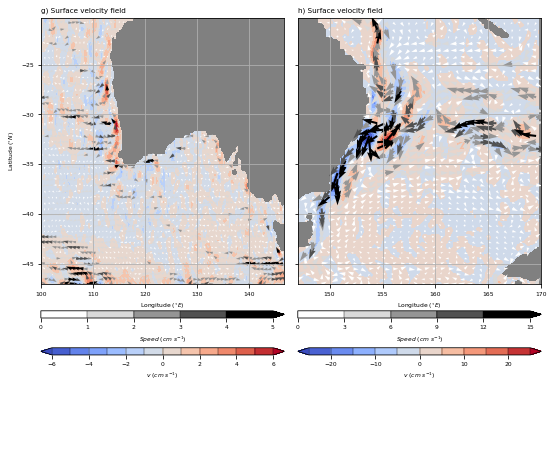

In [30]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

fig = plt.figure() 
fig.set_size_inches(7.5,12)
matplotlib.rcParams.update({'font.size': 6}) 
col = 2
row = 6

ax = plt.subplot2grid((row, col), (3, 0), rowspan=2, colspan=1)
cont_lev = arange(-6, 6, 1)
u_anom = u_rcp85 - u_hist5069
v_anom = v_rcp85 - v_hist5069
X_LIM = [100, 147]
Y_LIM = [-47, -20]
X = v_anom.xu_ocean[
    find_nearest_index(v_anom.xu_ocean.data, X_LIM[0]):find_nearest_index(v_anom.xu_ocean.data, X_LIM[1])]
Y = v_anom.yu_ocean[
    find_nearest_index(v_anom.yu_ocean.data, Y_LIM[0]):find_nearest_index(v_anom.yu_ocean.data, Y_LIM[1])]
Xm, Ym = np.meshgrid(X,Y)
U = np.array(u_anom[
    find_nearest_index(v_anom.yu_ocean.data, Y_LIM[0]):find_nearest_index(v_anom.yu_ocean.data, Y_LIM[1]),
    find_nearest_index(v_anom.xu_ocean.data, X_LIM[0]):find_nearest_index(v_anom.xu_ocean.data, X_LIM[1])
])
V = np.array(v_anom[
    find_nearest_index(v_anom.yu_ocean.data, Y_LIM[0]):find_nearest_index(v_anom.yu_ocean.data, Y_LIM[1]),
    find_nearest_index(v_anom.xu_ocean.data, X_LIM[0]):find_nearest_index(v_anom.xu_ocean.data, X_LIM[1])
])
contf = plt.contourf(X, Y, V, add_colorbar=False, levels=cont_lev, cmap=plt.cm.coolwarm, extend='both')
plt.title('')
n = 3

speed = np.sqrt(U**2 + V**2)
U1 = cp(U)
V1 = cp(V)
U2 = U / speed
V2 = V / speed
tol = 0
U2 = U1 / (U1**2 + V1**2)**(1/4)
V2 = V1 / (U1**2 + V1**2)**(1/4)
speed2 = cp(speed)
# speed2[speed < tol] = np.NaN

vmin=tol
vmax=5
step=5
Q_lev = np.linspace(vmin, vmax, step+1)
norm = matplotlib.colors.Normalize(vmin=vmin,vmax=vmax,clip=False)
cmap = matplotlib.colors.ListedColormap(plt.cm.Greys(np.linspace(0,1,step)), "name")

# print(X.shape)
# print(Y.shape)
# print(U1.shape)
# print(V1.shape)
# print(U2.shape)
# print(V2.shape)
# print(speed.shape)

# Q1 = plt.quiver(X[0:188:n], 
#                 Y[0:132:n], 
#                 U1[0:132:n, 0:188:n], 
#                 V1[0:132:n, 0:188:n],
#                 width=0.0015, scale=100,
#                 headwidth=4.5, headaxislength=3.75, 
#                 facecolor='w', edgecolor='k', linewidth=0.2)

Q2 = plt.quiver(X[0:188:n], 
                Y[0:132:n], 
                U2[0:132:n, 0:188:n], 
                V2[0:132:n, 0:188:n],
                speed2[0:132:n, 0:188:n],
                cmap=cmap, norm=norm,
                width=0.005, scale=80,
                edgecolor='k', linewidth=0)

plt.grid()
plt.title('g) Surface velocity field', loc='left')
plt.xlabel('')
plt.ylabel('')
ax.set_facecolor('gray')
plt.xlabel('Longitude ($^{\circ}E$)')
plt.ylabel('Latitude ($^{\circ}N$)')
ax = plt.subplot2grid((row, col), (5, 0), rowspan=1, colspan=1)
ax_divider = make_axes_locatable(ax)
cax1 = ax_divider.append_axes("top", size=0.1, pad="2%")
cbar = plt.colorbar(contf, cax=cax1, orientation='horizontal', drawedges=True)
cbar.set_label(r'$v$ ($cm\ s^{-1}$)') 
cax2 = ax_divider.append_axes("top", size=0.1, pad="40%")
cbar = plt.colorbar(Q2, cax=cax2, orientation='horizontal', drawedges=True, extend='max')
cbar.set_ticks(Q_lev)
cbar.set_label(r'$Speed$ ($cm\ s^{-1}$)')
ax.axis('off')


ax = plt.subplot2grid((row, col), (3, 1), rowspan=2, colspan=1)
cont_lev = arange(-25, 25, 5)
u_anom = u_rcp85 - u_hist5069
v_anom = v_rcp85 - v_hist5069
X_LIM = [147, 170]
X = v_anom.xu_ocean[
    find_nearest_index(v_anom.xu_ocean.data, X_LIM[0]):find_nearest_index(v_anom.xu_ocean.data, X_LIM[1])]
Xm, Ym = np.meshgrid(X,Y)
U = np.array(u_anom[
    find_nearest_index(v_anom.yu_ocean.data, Y_LIM[0]):find_nearest_index(v_anom.yu_ocean.data, Y_LIM[1]),
    find_nearest_index(v_anom.xu_ocean.data, X_LIM[0]):find_nearest_index(v_anom.xu_ocean.data, X_LIM[1])
])
V = np.array(v_anom[
    find_nearest_index(v_anom.yu_ocean.data, Y_LIM[0]):find_nearest_index(v_anom.yu_ocean.data, Y_LIM[1]),
    find_nearest_index(v_anom.xu_ocean.data, X_LIM[0]):find_nearest_index(v_anom.xu_ocean.data, X_LIM[1])
])
contf = plt.contourf(X, Y, V, add_colorbar=False, levels=cont_lev, cmap=plt.cm.coolwarm, extend='both')
plt.title('')
n = 3

speed = np.sqrt(U**2 + V**2)
U1 = cp(U)
V1 = cp(V)
U2 = U / speed
V2 = V / speed
tol = 0
U2 = U1 / (U1**2 + V1**2)**(1/4)
V2 = V1 / (U1**2 + V1**2)**(1/4)
speed2 = cp(speed)
# speed2[speed < tol] = np.NaN

print(X.shape)
print(Y.shape)
print(U1.shape)
print(V1.shape)
print(U2.shape)
print(V2.shape)
print(speed.shape)

print(U1)

vmin=tol
vmax=15
step=5
Q_lev = np.linspace(vmin, vmax, step+1)
norm = matplotlib.colors.Normalize(vmin=vmin,vmax=vmax,clip=False)
cmap = matplotlib.colors.ListedColormap(plt.cm.Greys(np.linspace(0,1,step)), "name")

# Q1 = plt.quiver(X[0:72:n], 
#                 Y[0:132:n], 
#                 U1[0:132:n, 0:72:n], 
#                 V1[0:132:n, 0:72:n],
#                 norm=norm,
#                 width=0.0015, scale=100,
#                 headwidth=4.5, headaxislength=3.75, 
#                 facecolor='w', edgecolor='k', linewidth=0.2)

# Q2 = plt.quiver(X[0:92:n], 
#                 Y[0:132:n], 
#                 U2[0:132:n, 0:92:n], 
#                 V2[0:132:n, 0:92:n],
#                 speed2[0:132:n, 0:92:n],
#                 cmap=cmap, norm=norm,
#                 width=0.0035, scale=100,
#                 headwidth=4.5, headaxislength=3.75, 
#                 edgecolor='k', linewidth=0.2)

Q2 = plt.quiver(X[0:92:n], 
                Y[0:132:n], 
                U2[0:132:n, 0:92:n], 
                V2[0:132:n, 0:92:n],
                speed2[0:132:n, 0:92:n],
                cmap=cmap, norm=norm,
                width=0.0085, scale=60,
                edgecolor='k', linewidth=0)

plt.grid()
plt.title('h) Surface velocity field', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.xticks(arange(150,170,5))
plt.gca().set_yticklabels('')
plt.xlabel('Longitude ($^{\circ}E$)')
ax.set_facecolor('gray')
ax = plt.subplot2grid((row, col), (5, 1), rowspan=1, colspan=1)
ax_divider = make_axes_locatable(ax)
cax1 = ax_divider.append_axes("top", size=0.1, pad="2%")
cbar = plt.colorbar(contf, cax=cax1, orientation='horizontal', drawedges=True)
cbar.set_label(r'$v$ ($cm\ s^{-1}$)') 
cax2 = ax_divider.append_axes("top", size=0.1, pad="40%")
cbar = plt.colorbar(Q2, cax=cax2, orientation='horizontal', drawedges=True, extend='max')
cbar.set_ticks(Q_lev)
cbar.set_label(r'$Speed$ ($cm\ s^{-1}$)')
ax.axis('off')




fig.tight_layout(pad=0, w_pad=-2, h_pad=-0.5)

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_3.png', bbox_inches='tight', dpi=300)